In [175]:
# Importera nödvändiga bibliotek
import pandas as pd
import numpy as np
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt

In [176]:
# Läs in data från CSV-filen 'spam.csv'
df = pd.read_csv('spam.csv', sep=',', encoding = "ISO-8859-1")

In [177]:
# Visa antalet rader och kolumner i dataframen
df.shape

(5572, 5)

In [178]:
# Visa de första 5 raderna i dataframen
df.head(5)

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [179]:
# Ta bort onödiga kolumner
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [180]:
# Visa de första 5 raderna i dataframen igen för att bekräfta att kolumnerna har tagits bort
df.head(5)

v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [181]:
# Byt namn på kolumnerna till mer beskrivande namn
df.rename(columns={df.columns[0]: 'spam_or_ham', df.columns[1]: 'messages'}, inplace=True)
df.head(5)

spam_or_ham                                           messages
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...

In [182]:
# Läs in meddelandena från CSV-filen
messages = [line.rstrip() for line in open('spam.csv', encoding = "ISO-8859-1")]
print(messages[1])

ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,


In [183]:
# Visa statistik för varje klass (spam eller ham)
df.groupby('spam_or_ham').describe()

messages         \
               count unique   
spam_or_ham                   
ham             4825   4516   
spam             747    653   

                                                                     
                                                           top freq  
spam_or_ham                                                          
ham                                     Sorry, I'll call later   30  
spam         Please call our customer service representativ...    4

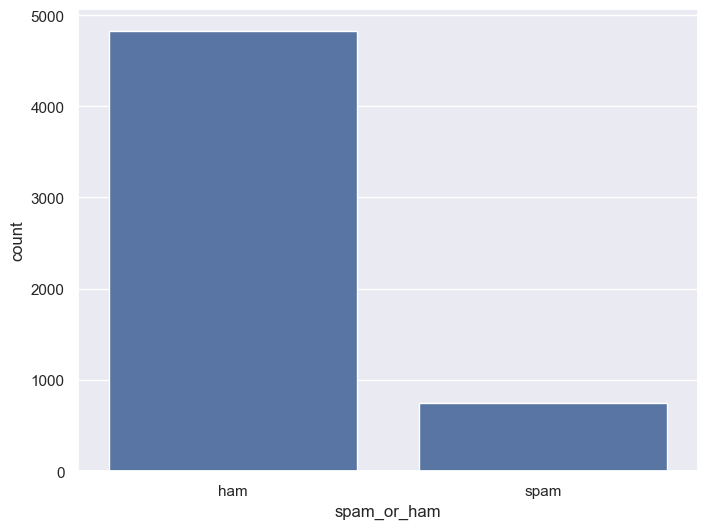

In [184]:
# Skapa ett stapeldiagram för att visa antalet spam och ham-meddelanden
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(x='spam_or_ham',data=df)
plt.show()

In [185]:
# Räkna antalet duplicerade rader
df.duplicated().sum()

403

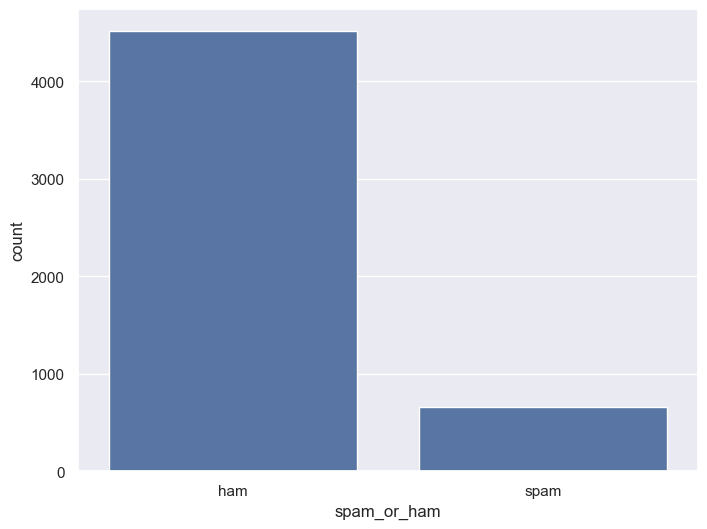

In [186]:
# Ta bort duplicerade rader
df.drop_duplicates(inplace=True)

# Skapa ett nytt stapeldiagram för att visa antalet spam och ham-meddelanden efter att duplicerade rader har tagits bort
plt.figure(figsize=(8,6))
sns.countplot(x='spam_or_ham',data=df)
plt.show()

In [219]:
# Byt ut textetiketterna 'ham' och 'spam' mot numeriska etiketter
df['spam_or_ham'].replace({'ham': 0, 'spam': 1}, inplace=True)

In [188]:

df.head()

spam_or_ham                                           messages
0            0  Go until jurong point, crazy.. Available only ...
1            0                      Ok lar... Joking wif u oni...
2            1  Free entry in 2 a wkly comp to win FA Cup fina...
3            0  U dun say so early hor... U c already then say...
4            0  Nah I don't think he goes to usf, he lives aro...

In [189]:
# Dela upp dataframen i ett träningsset och ett testset
train_df, test_df = train_test_split(df, test_size=500)
test_df.shape

(500, 2)

In [190]:
# Räkna antalet spam och ham-meddelanden i testsetet
test_df['spam_or_ham'].value_counts()

spam_or_ham
0    424
1     76
Name: count, dtype: int64

In [191]:
# Räkna antalet spam och ham-meddelanden i träningssetet
train_df['spam_or_ham'].value_counts()

spam_or_ham
0    4092
1     577
Name: count, dtype: int64

In [192]:
# Importera nödvändiga bibliotek för textrensning
import re
import string

In [193]:
# Definiera en funktion för att rensa texten
def clean_text(messages):
    if messages:
        messages = re.sub(r"[^a-zA-Z]", " ", messages)
        messages = messages.translate(str.maketrans("", "", string.punctuation))
        messages = messages.lower()
    return messages


In [194]:
# Applicera textrensningen på meddelandena
df['messages'] = df['messages'].apply(clean_text)

In [195]:
df.head(10)

spam_or_ham                                           messages
0            0  go until jurong point  crazy   available only ...
1            0                      ok lar    joking wif u oni   
2            1  free entry in   a wkly comp to win fa cup fina...
3            0  u dun say so early hor    u c already then say   
4            0  nah i don t think he goes to usf  he lives aro...
5            1  freemsg hey there darling it s been   week s n...
6            0  even my brother is not like to speak with me  ...
7            0  as per your request  melle melle  oru minnamin...
8            1  winner   as a valued network customer you have...
9            1  had your mobile    months or more  u r entitle...

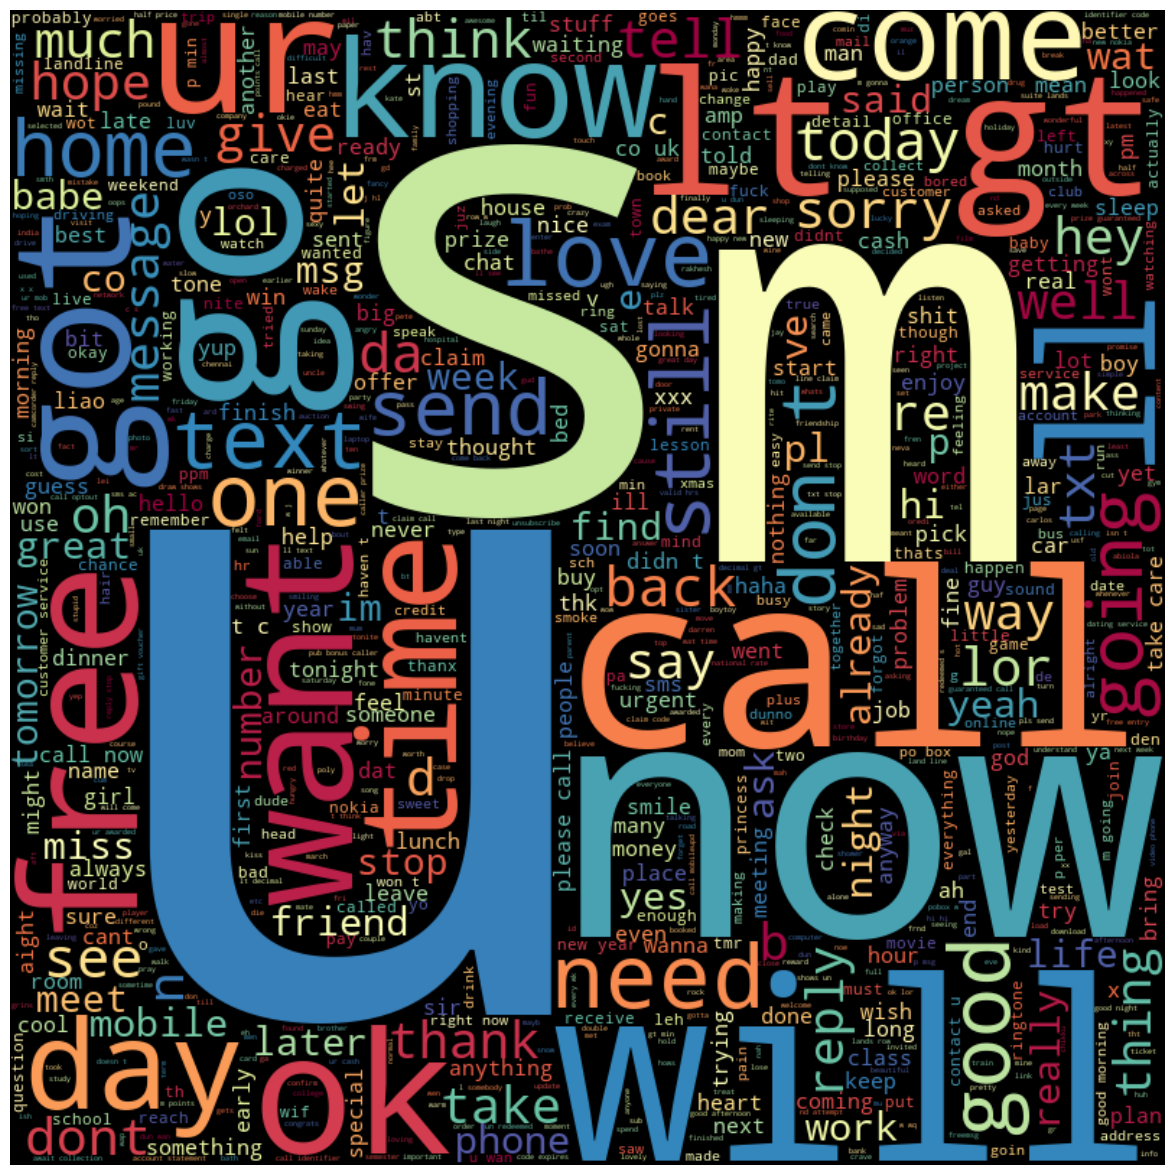

In [196]:
# Skapa en ordmoln för att visualisera de mest frekventa orden i meddelandena
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(15,15))
all_text=" ".join(df['messages'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="Spectral").generate(all_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

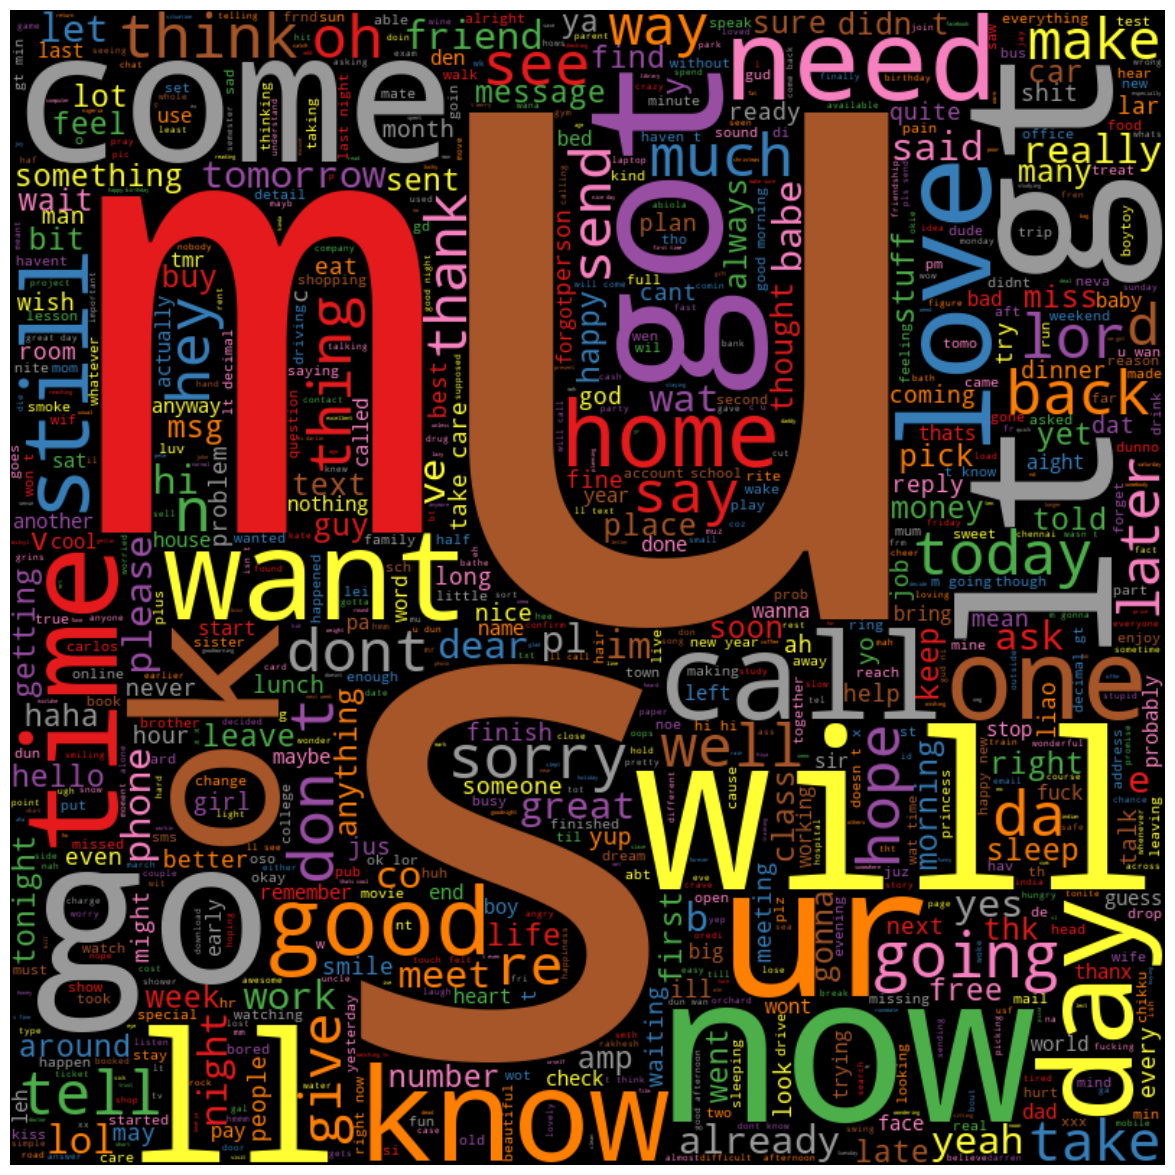

In [197]:
# Skapa en ordmoln för att visualisera de mest frekventa orden i ham-meddelandena
plt.figure(figsize=(15,15))
ham_data_wordcloud=df[df['spam_or_ham']==0]
ham_text=" ".join(ham_data_wordcloud['messages'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="Set1").generate(ham_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

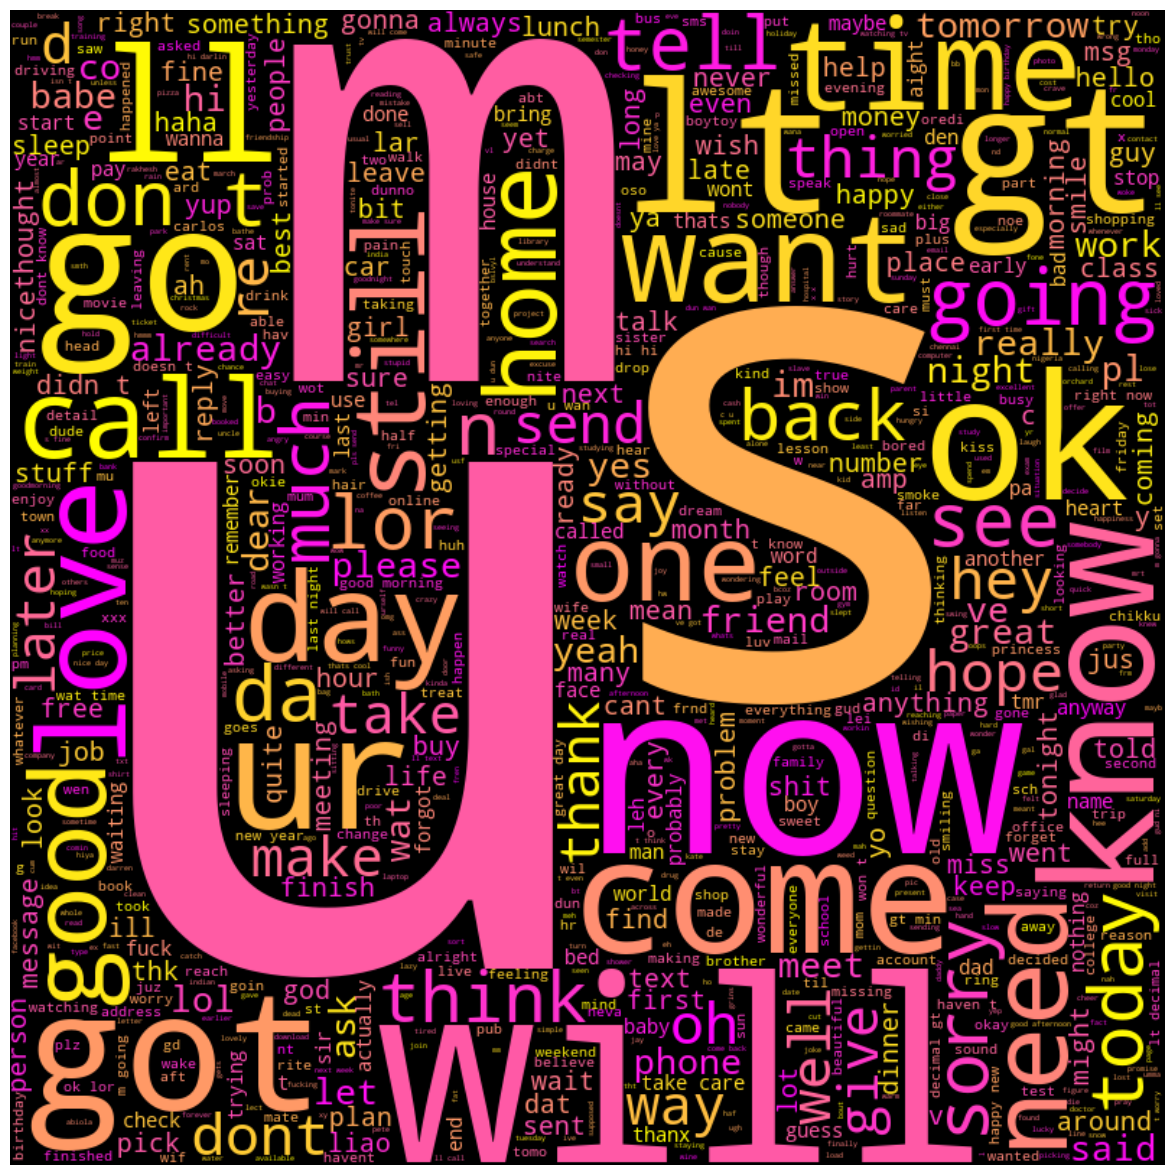

In [198]:
# Skapa en ordmoln för att visualisera de mest frekventa orden i spam-meddelandena
plt.figure(figsize=(15,15))
spam_data_wordcloud=df[df['spam_or_ham']==1]
spam_text=" ".join(ham_data_wordcloud['messages'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="spring").generate(spam_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [199]:
# Skapa en lista med de mest frekventa orden i alla meddelanden
most_common_text = " ".join(df['messages'].values.tolist())
most_common_text = most_common_text.translate(str.maketrans('', '', string.punctuation))
word_freq = most_common_text.split()

In [200]:
# Räkna antalet förekomster av varje ord
from collections import Counter
count_words = Counter(word_freq)
most_common_words = count_words.most_common(20)

In [201]:
# Skapa en dataframe med de mest frekventa orden och deras antal
data_frame = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

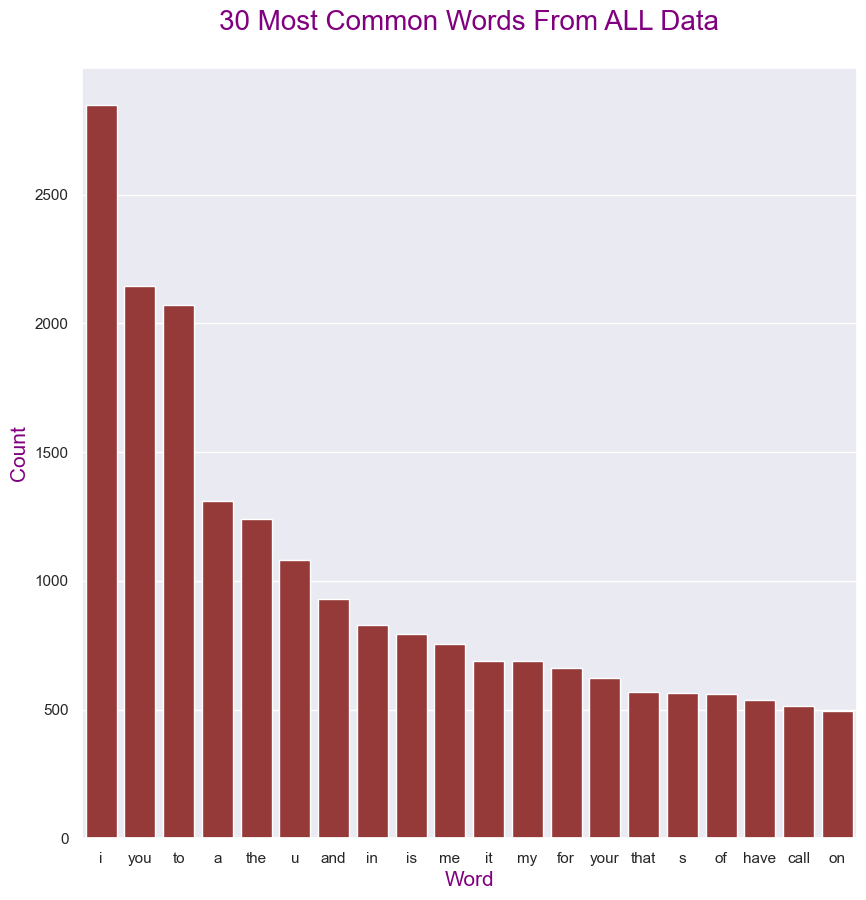

In [202]:
# Skapa ett stapeldiagram för att visualisera de mest frekventa orden
sns.set(style="dark")
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.barplot(x="Word", y="Count", data=data_frame, color="brown")
plt.title("30 Most Common Words From ALL Data\n", fontsize=20, color="purple")
plt.xlabel("Word", fontsize=15, color="purple")
plt.ylabel("Count", fontsize=15, color="purple")

plt.show()

In [203]:
# Omvandla texten till en matris av TF-IDF-funktioner
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
X=tf.fit_transform(df['messages'])
Y=df['spam_or_ham']

In [212]:
# Dela upp dataframen i ett träningsset och ett testset
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, random_state=40)

In [213]:
# Träna en logistisk regressionsmodell på träningsdatat
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Skapa en instans av modellen
model = LogisticRegression()

# Träna modellen med träningsdata
model.fit(X_train, y_train)

# Gör förutsägelser på testdata
predictions = model.predict(X_test)

# Utvärdera modellen
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98       688
           1       0.92      0.67      0.78        88

    accuracy                           0.96       776
   macro avg       0.94      0.83      0.88       776
weighted avg       0.96      0.96      0.95       776


In [214]:
# Skapa en förvirringsmatris för att utvärdera modellens prestanda
from sklearn.metrics import confusion_matrix

In [215]:
# Beräkna modellens noggrannhet
from sklearn.metrics import accuracy_score

# Importera SVC (Support Vector Classifier) för att träna en annan modell
from sklearn.svm import SVC

# Skapa en SVC med en linjär kärna
svm=SVC(kernel='linear')

# Träna SVC-modellen med träningsdata
svm.fit(X_train,y_train)

# Gör förutsägelser på testdata med den tränade modellen
pred1=svm.predict(X_test)

# Beräkna noggrannheten för modellens förutsägelser
acc0=accuracy_score(y_test,pred1)
print("Accuracy score :",acc0)

Accuracy score : 0.9768041237113402


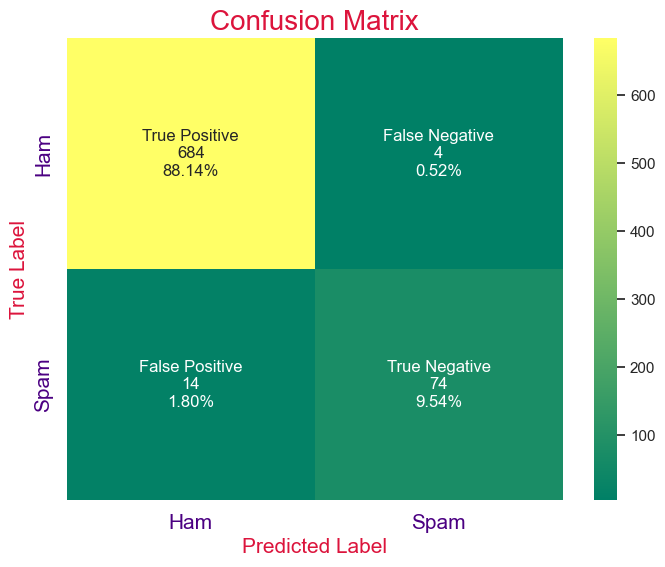

In [216]:
# Definiera etiketterna för dina klasser och för varje cell i förvirringsmatrisen
my_label_data=["Ham","Spam"]
my_matrix= confusion_matrix(y_test,pred1)
my_label = ["True Positive","False Negative","False Positive","True Negative"]
my_label_count=["{0:0.0f}".format(value) for value in my_matrix.flatten()]
percentage=["{0:.2%}".format(value) for value in my_matrix.flatten()/np.sum(my_matrix)]

# Skapa etiketter för varje cell i förvirringsmatrisen
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(my_label,my_label_count,percentage)]
labels=np.asarray(labels).reshape(2, 2)


plt.figure(figsize=(8,6))
sns.heatmap(my_matrix, annot=labels, cmap="summer", fmt="", cbar=True,
            xticklabels=my_label_data,yticklabels=my_label_data)
plt.xlabel("Predicted Label",fontsize=15,color="crimson")
plt.ylabel("True Label",fontsize=15,color="crimson")
plt.title("Confusion Matrix",fontsize=20,color="crimson")
plt.xticks(fontsize=15,color="indigo")
plt.yticks(fontsize=15,color="indigo")
plt.show()

In [217]:
# Skriv ut en klassificeringsrapport för att utvärdera modellens prestanda
print(classification_report(y_test,pred1,target_names=my_label_data))

              precision    recall  f1-score   support

         Ham       0.98      0.99      0.99       688
        Spam       0.95      0.84      0.89        88

    accuracy                           0.98       776
   macro avg       0.96      0.92      0.94       776
weighted avg       0.98      0.98      0.98       776


In [221]:
# Skapa två exempelmeddelanden
test_messages = ["Congratulations!!!!! You've won a million dollars!",  # Detta låter som ett spam-meddelande
                 "Hi, how are you doing today?"]  # Detta låter som ett 'ham'-meddelande (inte spam)

# Omvandla meddelandena till vektorer med hjälp av din TfidfVectorizer
test_vectors = tf.transform(test_messages)

# Använd din tränade modell för att göra förutsägelser
predictions = model.predict(test_vectors)

# Skriv ut förutsägelserna
print(predictions)


[0 0]
